## Importing Libraries

The project commences on the importation of the neccessary libraries usable. 

In [113]:
# import numpy for numeric analysis 
import numpy as np
# Import pandas for analysis and data manupulation
import pandas as pd
# Import SQL
import sqlite3
# seaborn and matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

Here, we load the various datasets some of which will be used for this whole project while others will be dropped on vitality basis. The projects designates to use the very vital data in the making of predictions.

In [114]:
bommovie = pd.read_csv('bom.movie_gross.csv.gz')

In [115]:
tmdbmovies = pd.read_csv('project/tmdb.movies.csv')

In [116]:
moviebudgets = pd.read_csv('project/tn.movie_budgets.csv')

In [117]:
rtmovie  = pd.read_csv('project/rt.movie_info.tsv' , delimiter="\t")

In [118]:
rtreviews = pd.read_csv('project/rt.reviews.tsv' , delimiter="\t" , encoding = 'latin1')

In [119]:
! ls

README.md

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.



Untitled.ipynb
bom.movie_gross.csv
bom.movie_gross.csv.gz
im.db
im.db.zip
project
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [120]:
conn = sqlite3.connect('im.db')
cur = conn.cursor()
cur.execute("""
            SELECT name
            FROM sqlite_master
            WHERE type = 'table'
            ;
            """
           )

## Dealing with each data separately

At this point, it is worth looking into the different components of the given datasets to know the useful ones in making the predictions. Thus, understanding of each data is done separately. For the chosen data sets, there will be cleaning of the data and the making of the relevant conclusions. The section also includes visualizations for some of the selected data sets.

### 1. bom.movie_gross.csv.gz

#### Data Understanding 

In [121]:
bommovie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [122]:
bommovie.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [123]:
bommovie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

The studio, domestic gross and foreign gross are vital and will be used.

#### Data preparation/cleaning

In [124]:
# Detecting missing values in the dataframe
bommovie.isnull()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [125]:
# choosing whether a column has any missing values
bommovie.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [126]:
# Total number of null values for each section 
bommovie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

We drop the domestic gross out of its huge missing values

In [127]:
# arranging the columns with regard to the number of missing values
bommovie.isna().sum().sort_values(ascending = False)

foreign_gross     1350
domestic_gross      28
studio               5
title                0
year                 0
dtype: int64

In [128]:
# checking the shape after cleaning
bommovie.shape

(3387, 5)

##### replacing the missing values

In [129]:
# Finding the mean of the domestic gross
bommovie['domestic_gross'].mean()

28745845.06698422

In [130]:
# replacing and ensuring the changes stand
bommovie['domestic_gross'].fillna(bommovie['domestic_gross'].mean() , inplace = True)
bommovie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [131]:
# Checking whether the domestic gross data is cleaned 
bommovie.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [132]:
# Top ten studios with regarding to domestic gross incomes
Top_10_studios = bommovie.groupby('studio')['domestic_gross'].sum().sort_values(ascending = False).reset_index()
Top_10_studios.head(10)

,studio,domestic_gross
0,BV,1.841903e+10
1,Uni.,1.290239e+10
2,WB,1.216805e+10
3,Fox,1.094950e+10
4,Sony,8.488429e+09
5,Par.,7.685871e+09
6,LGF,4.147709e+09
7,WB (NL),3.995700e+09
8,LG/S,2.078200e+09
9,P/DW,1.682900e+09


The above studios are the top ten studios to start for the organization. The BV studio is the most recommended out of its huge domestic gross. 

#### 2. tmdb.movies.csv

#### Data Understanding 

In [133]:
tmdbmovies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [134]:
tmdbmovies.info

<bound method DataFrame.info of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-

In [135]:
tmdbmovies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

#### Data cleaning 

In [136]:
# To check for null values
tmdbmovies.isnull()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False,False


In [137]:
# checking for the presence of null values in any column
tmdbmovies.isnull().any()

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

The data is clean for this case

In [138]:
# The most popular movie by title 
most_popular = tmdbmovies.groupby('title')['popularity'].sum().sort_values(ascending = False).reset_index
most_popular

<bound method Series.reset_index of title
Blade Runner 2049             97.142
Thor: Ragnarok                86.900
Avengers: Infinity War        80.773
John Wick                     78.123
Big Hero 6                    73.840
                               ...  
Miles To Go Before I Sleep     0.600
Milfs vs. Zombies              0.600
Militia Rising                 0.600
Milk?                          0.600
해양경찰 마르코                       0.600
Name: popularity, Length: 24688, dtype: float64>

Above is a list of the most popular movies

In [139]:
# highest voted movie
highest_voted = tmdbmovies.groupby('title')['vote_average'].sum().sort_values(ascending = False).reset_index
highest_voted

<bound method Series.reset_index of title
The Box                  39.5
Home                     39.4
The Gift                 37.1
Eden                     34.6
Lucky                    34.4
                         ... 
$2 Tuesdays The Movie     0.0
A Woman's Nightmare       0.0
Dead Write                0.0
Chalk and Numbers         0.0
Duel of Legends           0.0
Name: vote_average, Length: 24688, dtype: float64>

#### Vsualization 

Below is a visualization of the relationship between the popularity of a movie and the average votes for the movie. 

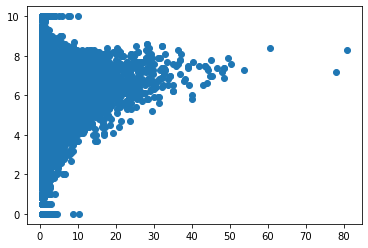

In [140]:
plt.scatter(tmdbmovies.popularity, tmdbmovies.vote_average)

The visualization represents a low positive correlation between the two variables. Thus, a movie can be popular and still fail to be voted out as one of the best. However, for the sale purposes, popularity ranks higher since it is directly in line with sales. 

#### 3. tn.movie_budgets.csv

#### Data Understanding

In [141]:
moviebudgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [142]:
moviebudgets.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

In [143]:
moviebudgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

This data is not vital for our case

#### Data Cleaning 

In [144]:
# Checking for null values
moviebudgets.isnull()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [145]:
moviebudgets.isnull().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

In [146]:
moviebudgets.isna().sum().sort_values(ascending = False)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset is clean. No missing values

#### Visualization Using the top 5 movies

In [147]:
top5 = dropped1.head()
top5

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


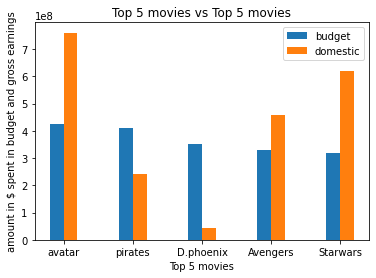

In [148]:
import matplotlib.pyplot as plt
import numpy as np

w = 0.2
x = ['avatar' , 'pirates' , 'D.phoenix','Avengers' , 'Starwars']
budget = [425000000, 410600000, 350000000, 330600000, 317000000]
domestic = [760507625, 241063875, 42762350, 459005868, 620181382]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,budget,w,label= 'budget')
plt.bar(bar2,domestic,w,label= 'domestic')

plt.xlabel('Top 5 movies')
plt.ylabel('amount in $ spent in budget and gross earnings')
plt.title('Top 5 movies vs Top 5 movies')
plt.xticks(bar1 + w/2, x)
plt.legend()
plt.show()

This graph is a comparison of the amount spent in production and the domestic income for the top 5 movies. In some instances, the amount spent in production exceeds its income which implies losses. Thus, it is unfeasible to produce domestic scaled movies. This conclusion leads us to probing the feasibility of producing worldwide movies with regard to amount spent in producing and earnings. 

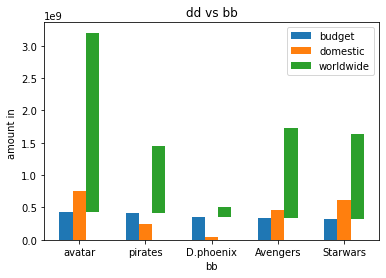

In [149]:
import matplotlib.pyplot as plt
import numpy as np

w = 0.2
x = ['avatar' , 'pirates' , 'D.phoenix','Avengers' , 'Starwars']
budget = [425000000, 410600000, 350000000, 330600000, 317000000]
domestic = [760507625, 241063875, 42762350, 459005868, 620181382]
worldwide = [2776345279, 1045663875, 149762350, 1403013963, 1316721747]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1,budget,w,label= 'budget')
plt.bar(bar2,domestic,w,label= 'domestic')
plt.bar(bar3,worldwide,w,bottom=budget,label= 'worldwide')

plt.xlabel('bb')
plt.ylabel('amount in ')
plt.title('dd vs bb')
plt.xticks(bar1 + w, x)
plt.legend()
plt.show()

Movie vs budget, domestic gross and worldwide gross. It is generally profitable to sell movies worldwide compared to domestically with regard to the incomes.

#### 4. rt.movie_info.tsv

#### Data Understanding

In [150]:
rtmovie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [151]:
rtmovie.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [152]:
rtmovie.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

This data set is not vital in our case


#### 5. rtreviews

#### Data understanding

In [153]:
rtreviews.info

<bound method DataFrame.info of          id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000                                                NaN    3/5   fresh

In [ ]:
rtreviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [155]:
rtreviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

This dataset will be overloked for our case

#### 6. imdb

#### Data understanding

In [156]:
tableNames = cur.fetchall()

In [157]:
tableNames

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

This data is not essential for our case